In [1]:
from torch import nn
import torch
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../data/Titanic-Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
label_encoder = LabelEncoder()

In [5]:
df["sex_enc"] = label_encoder.fit_transform(df["Sex"])

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_enc
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [7]:
df.drop(columns=["Cabin", "PassengerId", "Name", "Ticket"], inplace=True)
df.dropna(inplace=True)

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,sex_enc
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1


In [9]:
scaler = StandardScaler()

In [10]:
type(df["Age"].to_numpy())

numpy.ndarray

In [11]:
df["scaled_age"] = scaler.fit_transform(df["Age"].to_numpy().reshape(712, 1))

In [12]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,sex_enc,scaled_age
0,0,3,male,22.0,1,0,7.2500,S,1,-0.527669
1,1,1,female,38.0,1,0,71.2833,C,0,0.577094
2,1,3,female,26.0,0,0,7.9250,S,0,-0.251478
3,1,1,female,35.0,1,0,53.1000,S,0,0.369951
4,0,3,male,35.0,0,0,8.0500,S,1,0.369951


In [13]:
df["emb_enc"] = label_encoder.fit_transform(df["Embarked"])
df["scaled_fare"] = scaler.fit_transform(df["Fare"].to_numpy().reshape(-1, 1))

In [14]:
df.drop(columns=["Age", "Sex", "Embarked", "Fare"], inplace=True)

In [15]:
df.head()

,Survived,Pclass,SibSp,Parch,sex_enc,scaled_age,emb_enc,scaled_fare
0,0,3,1,0,1,-0.527669,2,-0.516380
1,1,1,1,0,0,0.577094,0,0.694046
2,1,3,0,0,0,-0.251478,2,-0.503620
3,1,1,1,0,0,0.369951,2,0.350326
4,0,3,0,0,1,0.369951,2,-0.501257


In [16]:
X = df.iloc[:, 1:].to_numpy()
y = df.iloc[:, 0].to_numpy()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2)

In [18]:
class MLP(nn.Module):

    def __init__(self, num_features=7):
        super().__init__()
        self.mlp = nn.Linear(num_features, 4)
        self.mlp2=nn.Linear(self.mlp.out_features,3)
        self.mlp3=nn.Linear(self.mlp2.out_features,1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        
        x = self.mlp(x)
        
        x= self.mlp2(x)
        
        x=self.mlp3(x)
        
        x = self.sigmoid(x)
        
        return x

In [19]:
mlp = MLP()

In [20]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.001)

In [21]:
for i in range(1000):
    output = mlp(torch.from_numpy(X_train).float())
    loss = loss_fn(output.float(), torch.from_numpy(y_train).reshape(-1, 1).float())
    print(loss)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

tensor(0.6966, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6960, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6954, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6948, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6942, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6936, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6930, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6925, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6919, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6913, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6907, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6902, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6896, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6890, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6885, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6879, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6874, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6868, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6863, grad_fn=<Bina

In [22]:
preds = mlp(torch.from_numpy(X_test).float())

In [23]:
l = []
for pred in preds:
    if pred > .5:
        l.append(1)
    else:
        l.append(0)

In [24]:
len(y_test)

143

In [25]:
z = 0
for a, b in zip(l, y_test):
    if a == b:
        z += 1

In [26]:
c = 0
for v in y_test:
    if v == 1:
        c += 1

In [27]:
z / len(y_test) * 100

79.02097902097903

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, preds.detach().numpy())
auc = roc_auc_score(y_test, preds.detach().numpy())


In [45]:
!pip3 install matplotlib

In [46]:
import matplotlib.pyplot as plt

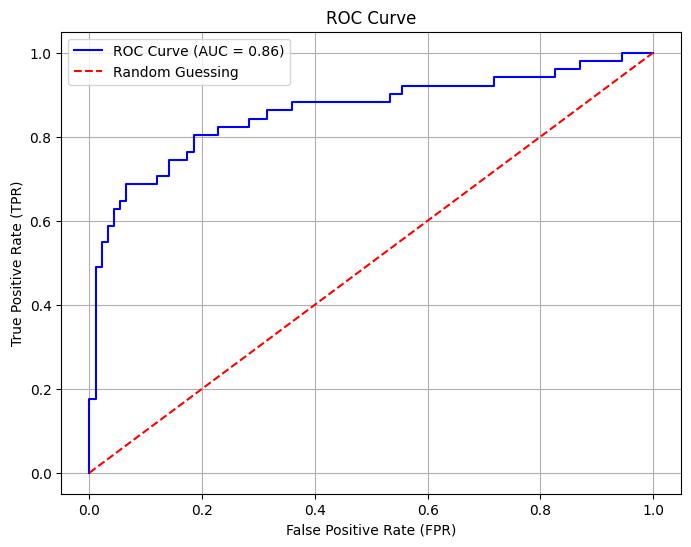

In [47]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


In [48]:
youden_index = tpr - fpr
best_threshold_youden = thresholds[np.argmax(youden_index)]

# Method 2: Closest Point to (0,1)
distances = np.sqrt((1 - tpr)**2 + fpr**2)
best_threshold_distance = thresholds[np.argmin(distances)]

print("Best Threshold (Youden's J):", best_threshold_youden)
print("Best Threshold (Closest to Top-Left):", best_threshold_distance)


Best Threshold (Youden's J): 0.639161
Best Threshold (Closest to Top-Left): 0.53779966


In [49]:
# Predict based on best threshold
y_pred_best = (preds.detach().numpy() >= best_threshold_youden).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_best)
print("Accuracy at Best Threshold:", accuracy)


Accuracy at Best Threshold: 0.8461538461538461
